In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.10f}'.format

In [197]:
df = pd.read_csv('../datasets/pepeusdt_15m.csv')
df.head()

event_type     event_time    symbol  kline_start_time  kline_close_time  \
0      kline  1719606278429  PEPEUSDT     1719605700000     1719606599999   
1      kline  1719606281084  PEPEUSDT     1719605700000     1719606599999   
2      kline  1719606283972  PEPEUSDT     1719605700000     1719606599999   
3      kline  1719606286973  PEPEUSDT     1719605700000     1719606599999   
4      kline  1719606290973  PEPEUSDT     1719605700000     1719606599999   

  interval  first_trade_id  last_trade_id   open_price  close_price  \
0      15m       131572261      131573175 0.0000117600 0.0000117600   
1      15m       131572261      131573176 0.0000117600 0.0000117500   
2      15m       131572261      131573177 0.0000117600 0.0000117600   
3      15m       131572261      131573179 0.0000117600 0.0000117500   
4      15m       131572261      131573180 0.0000117600 0.0000117600   

    high_price    low_price                 volume  number_of_trades  \
0 0.0000117900 0.0000117400 54918803914.0000000000               915   
1 0.0000117900 0.0000117400 54929553163.0000000000               916   
2 0.0000117900 0.0000117400 54930403503.0000000000               917   
3 0.0000117900 0.0000117400 54957530981.0000000000               919   
4 0.0000117900 0.0000117400 55189023018.0000000000               920   

   is_kline_closed  quote_assest_volume  take_buy_base_asset_volume  \
0            False    646195.5187450800      30580076845.0000000000   
1            False    646321.8224208300      30580076845.0000000000   
2            False    646331.8224192300      30580927185.0000000000   
3            False    646650.5702857299      30580927185.0000000000   
4            False    649372.9166408500      30812419222.0000000000   

   taker_buy_quote_asset_volume  ignore  
0             359857.6444073500       0  
1             359857.6444073500       0  
2             359867.6444057500       0  
3             359867.6444057500       0  
4             362589.9907608700       0

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84980 entries, 0 to 84979
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event_type                    84980 non-null  object 
 1   event_time                    84980 non-null  int64  
 2   symbol                        84980 non-null  object 
 3   kline_start_time              84980 non-null  int64  
 4   kline_close_time              84980 non-null  int64  
 5   interval                      84980 non-null  object 
 6   first_trade_id                84980 non-null  int64  
 7   last_trade_id                 84980 non-null  int64  
 8   open_price                    84980 non-null  float64
 9   close_price                   84980 non-null  float64
 10  high_price                    84980 non-null  float64
 11  low_price                     84980 non-null  float64
 12  volume                        84980 non-null  float64
 13  n

In [199]:
df['kline_close_time'] = pd.to_datetime(df['kline_close_time'], unit='ms')
df['kline_start_time'] = pd.to_datetime(df['kline_start_time'], unit='ms')
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')


df['kline_close_time'] = df['kline_close_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
df['kline_start_time'] = df['kline_start_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
df['event_time'] = df['event_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

In [183]:
df['event_time'] = df['event_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-4]

In [200]:
df.head(20)

event_type                  event_time    symbol  \
0       kline  2024-06-28 20:24:38.429000  PEPEUSDT   
1       kline  2024-06-28 20:24:41.084000  PEPEUSDT   
2       kline  2024-06-28 20:24:43.972000  PEPEUSDT   
3       kline  2024-06-28 20:24:46.973000  PEPEUSDT   
4       kline  2024-06-28 20:24:50.973000  PEPEUSDT   
5       kline  2024-06-28 20:24:56.430000  PEPEUSDT   
6       kline  2024-06-28 20:25:07.389000  PEPEUSDT   
7       kline  2024-06-28 20:25:10.888000  PEPEUSDT   
8       kline  2024-06-28 20:25:16.892000  PEPEUSDT   
9       kline  2024-06-28 20:25:19.305000  PEPEUSDT   
10      kline  2024-06-28 20:25:21.976000  PEPEUSDT   
11      kline  2024-06-28 20:25:24.552000  PEPEUSDT   
12      kline  2024-06-28 20:25:28.690000  PEPEUSDT   
13      kline  2024-06-28 20:25:31.975000  PEPEUSDT   
14      kline  2024-06-28 20:25:34.698000  PEPEUSDT   
15      kline  2024-06-28 20:25:37.701000  PEPEUSDT   
16      kline  2024-06-28 20:25:40.585000  PEPEUSDT   
17      kline  2024-06-28 20:25:43.976000  PEPEUSDT   
18      kline  2024-06-28 20:25:47.976000  PEPEUSDT   
19      kline  2024-06-28 20:25:50.928000  PEPEUSDT   

              kline_start_time            kline_close_time interval  \
0   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
1   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
2   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
3   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
4   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
5   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
6   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
7   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
8   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
9   2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
10  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
11  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
12  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
13  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
14  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
15  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
16  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
17  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
18  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   
19  2024-06-28 20:15:00.000000  2024-06-28 20:29:59.999000      15m   

    first_trade_id  last_trade_id   open_price  close_price   high_price  \
0        131572261      131573175 0.0000117600 0.0000117600 0.0000117900   
1        131572261      131573176 0.0000117600 0.0000117500 0.0000117900   
2        131572261      131573177 0.0000117600 0.0000117600 0.0000117900   
3        131572261      131573179 0.0000117600 0.0000117500 0.0000117900   
4        131572261      131573180 0.0000117600 0.0000117600 0.0000117900   
5        131572261      131573181 0.0000117600 0.0000117500 0.0000117900   
6        131572261      131573182 0.0000117600 0.0000117600 0.0000117900   
7        131572261      131573185 0.0000117600 0.0000117500 0.0000117900   
8        131572261      131573186 0.0000117600 0.0000117600 0.0000117900   
9        131572261      131573195 0.0000117600 0.0000117600 0.0000117900   
10       131572261      131573210 0.0000117600 0.0000117600 0.0000117900   
11       131572261      131573212 0.0000117600 0.0000117700 0.0000117900   
12       131572261      131573214 0.0000117600 0.0000117600 0.0000117900   
13       131572261      131573215 0.0000117600 0.0000117600 0.0000117900   
14       131572261      131573217 0.0000117600 0.0000117600 0.0000117900   
15       131572261      131573218 0.0000117600 0.0000117600 0.0000117900   
16       131572261      131573219 0.0000117600 0.0000117700 0.0

In [7]:
df = df.sort_values(by='event_time')

In [8]:
df[df['event_time'].duplicated(keep=False)]

Empty DataFrame
Columns: [event_type, event_time, symbol, kline_start_time, kline_close_time, interval, first_trade_id, last_trade_id, open_price, close_price, high_price, low_price, volume, number_of_trades, is_kline_closed, quote_assest_volume, take_buy_base_asset_volume, taker_buy_quote_asset_volume, ignore]
Index: []

In [9]:
df['time_diff_event_time'] = df['event_time'].diff()
df['event_time_seconds'] = df['time_diff_event_time'].dt.total_seconds()
df['event_time_seconds'] = df['event_time_seconds'].round().astype('Int64')

In [11]:
df['event_time_seconds'].sort_values(ascending=False)

51669    1625
24714      28
26279      28
23956      28
9435       26
19523      26
80949      25
3736       25
81117      25
20535      24
25561      24
29108      24
21398      24
16850      23
11220      23
6648       23
23913      22
20355      22
82153      22
26116      22
23699      22
10749      22
10673      22
21273      22
40859      21
27956      21
80528      21
49737      21
79526      21
27731      21
20516      21
29346      21
29278      21
25439      21
21120      21
84897      21
12720      20
23761      20
23791      20
81110      20
84719      20
49109      20
56453      19
53412      19
50166      19
23932      19
10337      19
81968      19
81967      19
82224      19
10783      19
26366      19
13568      19
14045      19
14138      19
23525      19
27772      19
9445       19
28083      19
13481      18
45718      18
81694      18
8745       18
78980      18
15821      18
24787      18
9331       18
33067      18
80510      18
29362      18
19533      18
8207  

In [12]:
df.loc[51668:51670]

event_type                       event_time    symbol  \
51668      kline 2024-06-30 21:57:44.742000+02:00  PEPEUSDT   
51669      kline 2024-06-30 22:24:49.402000+02:00  PEPEUSDT   
51670      kline 2024-06-30 22:24:51.882000+02:00  PEPEUSDT   

               kline_start_time                 kline_close_time interval  \
51668 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51669 2024-06-30 22:15:00+02:00 2024-06-30 22:29:59.999000+02:00      15m   
51670 2024-06-30 22:15:00+02:00 2024-06-30 22:29:59.999000+02:00      15m   

       first_trade_id  last_trade_id   open_price  close_price   high_price  \
51668       132181759      132184161 0.0000116300 0.0000116200 0.0000116600   
51669       132186994      132189414 0.0000116200 0.0000116600 0.0000116800   
51670       132186994      132189416 0.0000116200 0.0000116600 0.0000116800   

         low_price                  volume  number_of_trades  is_kline_closed  \
51668 0.0000115900 110669536406.0000000000              2403            False   
51669 0.0000116100 143981033346.0000000000              2421            False   
51670 0.0000116100 144008319842.0000000000              2423            False   

       quote_assest_volume  take_buy_base_asset_volume  \
51668   1286225.9928179099      62371576635.0000000000   
51669   1677856.4287430700     100887982885.0000000000   
51670   1678174.5892864300     100887982885.0000000000   

       taker_buy_quote_asset_volume  ignore   time_diff_event_time  \
51668             725219.4077923601       0 0 days 00:00:03.962000   
51669            1176024.5714325199       0 0 days 00:27:04.660000   
51670            1176024.5714325199       0 0 days 00:00:02.480000   

       event_time_seconds  
51668                   4  
51669                1625  
51670                   2

In [13]:
df1 = pd.read_csv('../datasets/pepeusdt_5m.csv')
df1.head()

event_type     event_time    symbol  kline_start_time  kline_close_time  \
0      kline  1719606182967  PEPEUSDT     1719606000000     1719606299999   
1      kline  1719606185966  PEPEUSDT     1719606000000     1719606299999   
2      kline  1719606188444  PEPEUSDT     1719606000000     1719606299999   
3      kline  1719606190966  PEPEUSDT     1719606000000     1719606299999   
4      kline  1719606193719  PEPEUSDT     1719606000000     1719606299999   

  interval  first_trade_id  last_trade_id   open_price  close_price  \
0       5m       131572709      131573022 0.0000117700 0.0000117700   
1       5m       131572709      131573024 0.0000117700 0.0000117700   
2       5m       131572709      131573025 0.0000117700 0.0000117700   
3       5m       131572709      131573026 0.0000117700 0.0000117700   
4       5m       131572709      131573028 0.0000117700 0.0000117600   

    high_price    low_price                 volume  number_of_trades  \
0 0.0000117700 0.0000117400 21865791172.0000000000               314   
1 0.0000117700 0.0000117400 21974175367.0000000000               316   
2 0.0000117700 0.0000117400 21984298991.0000000000               317   
3 0.0000117700 0.0000117400 22480616291.0000000000               318   
4 0.0000117700 0.0000117400 22489454157.0000000000               320   

   is_kline_closed  quote_assest_volume  take_buy_base_asset_volume  \
0            False    257149.5515482300      12380287280.0000000000   
1            False    258425.2335233800      12488671475.0000000000   
2            False    258544.3885778600      12498795099.0000000000   
3            False    264386.0431988600      12995112399.0000000000   
4            False    264490.0614647800      13003608575.0000000000   

   taker_buy_quote_asset_volume  ignore  
0             145601.3104659100       0  
1             146876.9924410600       0  
2             146996.1474955400       0  
3             152837.8021165400       0  
4             152937.8021080600       0

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85512 entries, 0 to 85511
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event_type                    85512 non-null  object 
 1   event_time                    85512 non-null  int64  
 2   symbol                        85512 non-null  object 
 3   kline_start_time              85512 non-null  int64  
 4   kline_close_time              85512 non-null  int64  
 5   interval                      85512 non-null  object 
 6   first_trade_id                85512 non-null  int64  
 7   last_trade_id                 85512 non-null  int64  
 8   open_price                    85512 non-null  float64
 9   close_price                   85512 non-null  float64
 10  high_price                    85512 non-null  float64
 11  low_price                     85512 non-null  float64
 12  volume                        85512 non-null  float64
 13  n

In [15]:
df1['kline_close_time'] = pd.to_datetime(df1['kline_close_time'], unit='ms', utc=True)
df1['kline_start_time'] = pd.to_datetime(df1['kline_start_time'], unit='ms', utc=True)
df1['event_time'] = pd.to_datetime(df1['event_time'], unit='ms', utc=True)

# datetime to berlin timezone UTC+2

df1['kline_close_time'] = df1['kline_close_time'].dt.tz_convert('Europe/Berlin')
df1['kline_start_time'] = df1['kline_start_time'].dt.tz_convert('Europe/Berlin')
df1['event_time'] = df1['event_time'].dt.tz_convert('Europe/Berlin')


In [ ]:
df1['event_time'] = df1['event_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

In [52]:
df1.head(50)

event_type                       event_time    symbol  \
0       kline 2024-06-28 22:23:02.967000+02:00  PEPEUSDT   
1       kline 2024-06-28 22:23:05.966000+02:00  PEPEUSDT   
2       kline 2024-06-28 22:23:08.444000+02:00  PEPEUSDT   
3       kline 2024-06-28 22:23:10.966000+02:00  PEPEUSDT   
4       kline 2024-06-28 22:23:13.719000+02:00  PEPEUSDT   
5       kline 2024-06-28 22:23:16.108000+02:00  PEPEUSDT   
6       kline 2024-06-28 22:23:18.199000+02:00  PEPEUSDT   
7       kline 2024-06-28 22:23:20.594000+02:00  PEPEUSDT   
8       kline 2024-06-28 22:23:22.613000+02:00  PEPEUSDT   
9       kline 2024-06-28 22:23:36.376000+02:00  PEPEUSDT   
10      kline 2024-06-28 22:23:38.655000+02:00  PEPEUSDT   
11      kline 2024-06-28 22:23:41.968000+02:00  PEPEUSDT   
12      kline 2024-06-28 22:23:44.405000+02:00  PEPEUSDT   
13      kline 2024-06-28 22:23:46.964000+02:00  PEPEUSDT   
14      kline 2024-06-28 22:23:50.432000+02:00  PEPEUSDT   
15      kline 2024-06-28 22:23:53.966000+02:00  PEPEUSDT   
16      kline 2024-06-28 22:23:56.893000+02:00  PEPEUSDT   
17      kline 2024-06-28 22:23:59.970000+02:00  PEPEUSDT   
18      kline 2024-06-28 22:24:03.970000+02:00  PEPEUSDT   
19      kline 2024-06-28 22:24:06.947000+02:00  PEPEUSDT   
20      kline 2024-06-28 22:24:10.912000+02:00  PEPEUSDT   
21      kline 2024-06-28 22:24:13.970000+02:00  PEPEUSDT   
22      kline 2024-06-28 22:24:16.971000+02:00  PEPEUSDT   
23      kline 2024-06-28 22:24:19.584000+02:00  PEPEUSDT   
24      kline 2024-06-28 22:24:22.316000+02:00  PEPEUSDT   
25      kline 2024-06-28 22:24:24.865000+02:00  PEPEUSDT   
26      kline 2024-06-28 22:24:28.971000+02:00  PEPEUSDT   
27      kline 2024-06-28 22:24:31.936000+02:00  PEPEUSDT   
28      kline 2024-06-28 22:24:38.429000+02:00  PEPEUSDT   
29      kline 2024-06-28 22:24:41.084000+02:00  PEPEUSDT   
30      kline 2024-06-28 22:24:43.972000+02:00  PEPEUSDT   
31      kline 2024-06-28 22:24:46.973000+02:00  PEPEUSDT   
32      kline 2024-06-28 22:24:50.973000+02:00  PEPEUSDT   
33      kline 2024-06-28 22:24:56.430000+02:00  PEPEUSDT   
34      kline 2024-06-28 22:25:00.007000+02:00  PEPEUSDT   
35      kline 2024-06-28 22:25:02.975000+02:00  PEPEUSDT   
36      kline 2024-06-28 22:25:07.389000+02:00  PEPEUSDT   
37      kline 2024-06-28 22:25:10.888000+02:00  PEPEUSDT   
38      kline 2024-06-28 22:25:16.892000+02:00  PEPEUSDT   
39      kline 2024-06-28 22:25:19.305000+02:00  PEPEUSDT   
40      kline 2024-06-28 22:25:21.975000+02:00  PEPEUSDT   
41      kline 2024-06-28 22:25:24.552000+02:00  PEPEUSDT   
42      kline 2024-06-28 22:25:28.690000+02:00  PEPEUSDT   
43      kline 2024-06-28 22:25:31.975000+02:00  PEPEUSDT   
44      kline 2024-06-28 22:25:34.698000+02:00  PEPEUSDT   
45      kline 2024-06-28 22:25:37.701000+02:00  PEPEUSDT   
46      kline 2024-06-28 22:25:40.585000+02:00  PEPEUSDT   
47      kline 2024-06-28 22:25:43.976000+02:00  PEPEUSDT   
48      kline 2024-06-28 22:25:47.976000+02:00  PEPEUSDT   
49      kline 2024-06-28 22:25:50.928000+02:00  PEPEUSDT   

            kline_start_time                 kline_close_time interval  \
0  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
1  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
2  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
3  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
4  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
5  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
6  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
7  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
8  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
9  2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
10 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
11 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.99900

In [17]:
df1 = df1.sort_values(by='event_time')

In [18]:
df1[df1['event_time'].duplicated(keep=False)]

Empty DataFrame
Columns: [event_type, event_time, symbol, kline_start_time, kline_close_time, interval, first_trade_id, last_trade_id, open_price, close_price, high_price, low_price, volume, number_of_trades, is_kline_closed, quote_assest_volume, take_buy_base_asset_volume, taker_buy_quote_asset_volume, ignore]
Index: []

In [19]:
df1['time_diff_event_time'] = df1['event_time'].diff()
df1['event_time_seconds'] = df1['time_diff_event_time'].dt.total_seconds()
df1['event_time_seconds'] = df1['event_time_seconds'].round().astype('Int64')

In [20]:
df1['event_time_seconds'].sort_values(ascending=False)

52044    1616
24917      28
24154      28
26498      28
9528       26
19692      26
3788       25
81458      25
81628      25
25776      24
20712      24
21581      24
29349      24
11330      23
16999      23
6716       23
23895      22
24109      22
26334      22
21456      22
82669      22
20532      22
10777      22
28187      21
29519      21
80030      21
20693      21
50101      21
41165      21
81036      21
27960      21
25651      21
29588      21
21302      21
49467      20
85250      20
23957      20
23987      20
85429      20
12842      20
82482      19
13695      19
82483      19
56852      19
50534      19
28315      19
24128      19
10891      19
9538       19
23719      19
10438      19
14176      19
28001      19
14269      19
82741      19
26585      19
8284       18
19702      18
46048      18
79481      18
15965      18
26658      18
82208      18
13607      18
29604      18
14702      18
81018      18
8829       18
24992      18
17265      18
33334      18
9422  

In [21]:
df1.loc[52043:52050]

event_type                       event_time    symbol  \
52043      kline 2024-06-30 21:57:44.742000+02:00  PEPEUSDT   
52044      kline 2024-06-30 22:24:40.428000+02:00  PEPEUSDT   
52045      kline 2024-06-30 22:24:42.892000+02:00  PEPEUSDT   
52046      kline 2024-06-30 22:24:44.900000+02:00  PEPEUSDT   
52047      kline 2024-06-30 22:24:47.053000+02:00  PEPEUSDT   
52048      kline 2024-06-30 22:24:49.402000+02:00  PEPEUSDT   
52049      kline 2024-06-30 22:24:51.882000+02:00  PEPEUSDT   
52050      kline 2024-06-30 22:24:54.019000+02:00  PEPEUSDT   

               kline_start_time                 kline_close_time interval  \
52043 2024-06-30 21:55:00+02:00 2024-06-30 21:59:59.999000+02:00       5m   
52044 2024-06-30 22:20:00+02:00 2024-06-30 22:24:59.999000+02:00       5m   
52045 2024-06-30 22:20:00+02:00 2024-06-30 22:24:59.999000+02:00       5m   
52046 2024-06-30 22:20:00+02:00 2024-06-30 22:24:59.999000+02:00       5m   
52047 2024-06-30 22:20:00+02:00 2024-06-30 22:24:59.999000+02:00       5m   
52048 2024-06-30 22:20:00+02:00 2024-06-30 22:24:59.999000+02:00       5m   
52049 2024-06-30 22:20:00+02:00 2024-06-30 22:24:59.999000+02:00       5m   
52050 2024-06-30 22:20:00+02:00 2024-06-30 22:24:59.999000+02:00       5m   

       first_trade_id  last_trade_id   open_price  close_price   high_price  \
52043       132182675      132184161 0.0000116200 0.0000116200 0.0000116600   
52044       132187753      132189400 0.0000116300 0.0000116600 0.0000116800   
52045       132187753      132189402 0.0000116300 0.0000116600 0.0000116800   
52046       132187753      132189406 0.0000116300 0.0000116700 0.0000116800   
52047       132187753      132189412 0.0000116300 0.0000116600 0.0000116800   
52048       132187753      132189414 0.0000116300 0.0000116600 0.0000116800   
52049       132187753      132189416 0.0000116300 0.0000116600 0.0000116800   
52050       132187753      132189421 0.0000116300 0.0000116700 0.0000116800   

         low_price                  volume  number_of_trades  is_kline_closed  \
52043 0.0000116100  39889932295.0000000000              1487            False   
52044 0.0000116200 104902338546.0000000000              1648            False   
52045 0.0000116200 105030013536.0000000000              1650            False   
52046 0.0000116200 105069867172.0000000000              1654            False   
52047 0.0000116200 105685040118.0000000000              1660            False   
52048 0.0000116200 106011986680.0000000000              1662            False   
52049 0.0000116200 106039273176.0000000000              1664            False   
52050 0.0000116200 106050018995.0000000000              1669            False   

       quote_assest_volume  take_buy_base_asset_volume  \
52043    464430.9510943700      27919444115.0000000000   
52044   1223440.6650151201      76356806692.0000000000   
52045   1224930.6149957699      76482766417.0000000000   
52046   1225395.5060090099      76502528165.0000000000   
52047   1232574.5567802701      77115950255.0000000000   
52048   1236389.4353983800      77384120774.0000000000   
52049   1236707.5959417401      77384120774.0000000000   
52050   1236832.9821383900      77393115485.0000000000   

       taker_buy_quote_asset_volume  ignore   time_diff_event_time  \
52043             325118.8156118300       0 0 days 00:00:03.962000   
52044             890723.8545267900       0 0 days 00:26:55.686000   
52045             892193.8045175400       0 0 days 00:00:02.464000   
52046             892424.4241167000       0 0 days 00:00:02.008000   
52047             899583.0599070000       0 0 days 00:00:02.153000   
52048             902712.6098637300       0 0 days 00:00:02.349000   
52049             902712.6098637300       0 0 days 00:00:02.480000   
52050             902817.5781411000       0 0 days 00:00:02.137000   

       event_time_seconds  
52043                   4  
52044                1616  
52045                   2  
52046                   2  
52047   

In [22]:
split_index_2 = 51668
split_index_1 = 52043

df15 = df.iloc[:split_index_2] 
df5 = df1.iloc[:split_index_1]

In [23]:
df15.head()

event_type                       event_time    symbol  \
0      kline 2024-06-28 22:24:38.429000+02:00  PEPEUSDT   
1      kline 2024-06-28 22:24:41.084000+02:00  PEPEUSDT   
2      kline 2024-06-28 22:24:43.972000+02:00  PEPEUSDT   
3      kline 2024-06-28 22:24:46.973000+02:00  PEPEUSDT   
4      kline 2024-06-28 22:24:50.973000+02:00  PEPEUSDT   

           kline_start_time                 kline_close_time interval  \
0 2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00      15m   
1 2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00      15m   
2 2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00      15m   
3 2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00      15m   
4 2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00      15m   

   first_trade_id  last_trade_id   open_price  close_price   high_price  \
0       131572261      131573175 0.0000117600 0.0000117600 0.0000117900   
1       131572261      131573176 0.0000117600 0.0000117500 0.0000117900   
2       131572261      131573177 0.0000117600 0.0000117600 0.0000117900   
3       131572261      131573179 0.0000117600 0.0000117500 0.0000117900   
4       131572261      131573180 0.0000117600 0.0000117600 0.0000117900   

     low_price                 volume  number_of_trades  is_kline_closed  \
0 0.0000117400 54918803914.0000000000               915            False   
1 0.0000117400 54929553163.0000000000               916            False   
2 0.0000117400 54930403503.0000000000               917            False   
3 0.0000117400 54957530981.0000000000               919            False   
4 0.0000117400 55189023018.0000000000               920            False   

   quote_assest_volume  take_buy_base_asset_volume  \
0    646195.5187450800      30580076845.0000000000   
1    646321.8224208300      30580076845.0000000000   
2    646331.8224192300      30580927185.0000000000   
3    646650.5702857299      30580927185.0000000000   
4    649372.9166408500      30812419222.0000000000   

   taker_buy_quote_asset_volume  ignore   time_diff_event_time  \
0             359857.6444073500       0                    NaT   
1             359857.6444073500       0 0 days 00:00:02.655000   
2             359867.6444057500       0 0 days 00:00:02.888000   
3             359867.6444057500       0 0 days 00:00:03.001000   
4             362589.9907608700       0        0 days 00:00:04   

   event_time_seconds  
0                <NA>  
1                   3  
2                   3  
3                   3  
4                   4

In [24]:
df5.head()

event_type                       event_time    symbol  \
0      kline 2024-06-28 22:23:02.967000+02:00  PEPEUSDT   
1      kline 2024-06-28 22:23:05.966000+02:00  PEPEUSDT   
2      kline 2024-06-28 22:23:08.444000+02:00  PEPEUSDT   
3      kline 2024-06-28 22:23:10.966000+02:00  PEPEUSDT   
4      kline 2024-06-28 22:23:13.719000+02:00  PEPEUSDT   

           kline_start_time                 kline_close_time interval  \
0 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
1 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
2 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
3 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   
4 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00       5m   

   first_trade_id  last_trade_id   open_price  close_price   high_price  \
0       131572709      131573022 0.0000117700 0.0000117700 0.0000117700   
1       131572709      131573024 0.0000117700 0.0000117700 0.0000117700   
2       131572709      131573025 0.0000117700 0.0000117700 0.0000117700   
3       131572709      131573026 0.0000117700 0.0000117700 0.0000117700   
4       131572709      131573028 0.0000117700 0.0000117600 0.0000117700   

     low_price                 volume  number_of_trades  is_kline_closed  \
0 0.0000117400 21865791172.0000000000               314            False   
1 0.0000117400 21974175367.0000000000               316            False   
2 0.0000117400 21984298991.0000000000               317            False   
3 0.0000117400 22480616291.0000000000               318            False   
4 0.0000117400 22489454157.0000000000               320            False   

   quote_assest_volume  take_buy_base_asset_volume  \
0    257149.5515482300      12380287280.0000000000   
1    258425.2335233800      12488671475.0000000000   
2    258544.3885778600      12498795099.0000000000   
3    264386.0431988600      12995112399.0000000000   
4    264490.0614647800      13003608575.0000000000   

   taker_buy_quote_asset_volume  ignore   time_diff_event_time  \
0             145601.3104659100       0                    NaT   
1             146876.9924410600       0 0 days 00:00:02.999000   
2             146996.1474955400       0 0 days 00:00:02.478000   
3             152837.8021165400       0 0 days 00:00:02.522000   
4             152937.8021080600       0 0 days 00:00:02.753000   

   event_time_seconds  
0                <NA>  
1                   3  
2                   2  
3                   3  
4                   3

In [41]:
merged_df = pd.merge(df15, df5, on='event_time', how='outer', indicator=True)

num_matching_rows = merged_df.shape[0]
num_matching_rows

56395

In [42]:
merged_df.head()

event_type_x                       event_time symbol_x kline_start_time_x  \
0          NaN 2024-06-28 22:23:02.967000+02:00      NaN                NaT   
1          NaN 2024-06-28 22:23:05.966000+02:00      NaN                NaT   
2          NaN 2024-06-28 22:23:08.444000+02:00      NaN                NaT   
3          NaN 2024-06-28 22:23:10.966000+02:00      NaN                NaT   
4          NaN 2024-06-28 22:23:13.719000+02:00      NaN                NaT   

  kline_close_time_x interval_x  first_trade_id_x  last_trade_id_x  \
0                NaT        NaN               NaN              NaN   
1                NaT        NaN               NaN              NaN   
2                NaT        NaN               NaN              NaN   
3                NaT        NaN               NaN              NaN   
4                NaT        NaN               NaN              NaN   

   open_price_x  close_price_x  high_price_x  low_price_x  volume_x  \
0           NaN            NaN           NaN          NaN       NaN   
1           NaN            NaN           NaN          NaN       NaN   
2           NaN            NaN           NaN          NaN       NaN   
3           NaN            NaN           NaN          NaN       NaN   
4           NaN            NaN           NaN          NaN       NaN   

   number_of_trades_x is_kline_closed_x  quote_assest_volume_x  \
0                 NaN               NaN                    NaN   
1                 NaN               NaN                    NaN   
2                 NaN               NaN                    NaN   
3                 NaN               NaN                    NaN   
4                 NaN               NaN                    NaN   

   take_buy_base_asset_volume_x  taker_buy_quote_asset_volume_x  ignore_x  \
0                           NaN                             NaN       NaN   
1                           NaN                             NaN       NaN   
2                           NaN                             NaN       NaN   
3                           NaN                             NaN       NaN   
4                           NaN                             NaN       NaN   

  time_diff_event_time_x  event_time_seconds_x event_type_y  symbol_y  \
0                    NaT                  <NA>        kline  PEPEUSDT   
1                    NaT                  <NA>        kline  PEPEUSDT   
2                    NaT                  <NA>        kline  PEPEUSDT   
3                    NaT                  <NA>        kline  PEPEUSDT   
4                    NaT                  <NA>        kline  PEPEUSDT   

         kline_start_time_y               kline_close_time_y interval_y  \
0 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   
1 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   
2 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   
3 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   
4 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   

      first_trade_id_y      last_trade_id_y  open_price_y  close_price_y  \
0 131572709.0000000000 131573022.0000000000  0.0000117700   0.0000117700   
1 131572709.0000000000 131573024.0000000000  0.0000117700   0.0000117700   
2 131572709.0000000000 131573025.0000000000  0.0000117700   0.0000117700   
3 131572709.0000000000 131573026.0000000000  0.0000117700   0.0000117700   
4 131572709.0000000000 131573028.0000000000  0.0000117700   0.0000117600   

   high_price_y  low_price_y               volume_y  number_of_trades_y  \
0  0.0000117700 0.0000117400 21865791172.0000000000      314.0000000000   
1  0.0000117700 0.0000117400 21974175367.0000000000      316.0000000000   
2  0.0000117700 0.0000117400 21984298991.0000000000      317.0000000000   
3  0.0000117700 0.0000117400 22480616291.0000000000      318.0000000000   
4  0.0000117700 0.0000117400 22489454157.0000000000      320.0000000000   

  is_kline_closed_y  

In [43]:
merged_df['_merge'].unique()

['right_only', 'both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [47]:
merged_df[merged_df['_merge'] == 'left_only'].head()

event_type_x                       event_time  symbol_x  \
41         kline 2024-06-28 22:25:21.976000+02:00  PEPEUSDT   
106        kline 2024-06-28 22:29:13.991000+02:00  PEPEUSDT   
112        kline 2024-06-28 22:29:25.991000+02:00  PEPEUSDT   
122        kline 2024-06-28 22:29:55.993000+02:00  PEPEUSDT   
126        kline        2024-06-28 22:30:03+02:00  PEPEUSDT   

           kline_start_time_x               kline_close_time_x interval_x  \
41  2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00        15m   
106 2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00        15m   
112 2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00        15m   
122 2024-06-28 22:15:00+02:00 2024-06-28 22:29:59.999000+02:00        15m   
126 2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   

        first_trade_id_x      last_trade_id_x  open_price_x  close_price_x  \
41  131572261.0000000000 131573210.0000000000  0.0000117600   0.0000117600   
106 131572261.0000000000 131573513.0000000000  0.0000117600   0.0000117400   
112 131572261.0000000000 131573842.0000000000  0.0000117600   0.0000117200   
122 131572261.0000000000 131573928.0000000000  0.0000117600   0.0000117300   
126        -1.0000000000        -1.0000000000  0.0000117300   0.0000117300   

     high_price_x  low_price_x               volume_x  number_of_trades_x  \
41   0.0000117900 0.0000117400 56325856037.0000000000      950.0000000000   
106  0.0000117900 0.0000117300 66549412501.0000000000     1253.0000000000   
112  0.0000117900 0.0000117100 68770062672.0000000000     1582.0000000000   
122  0.0000117900 0.0000117100 77000717486.0000000000     1668.0000000000   
126  0.0000117300 0.0000117300           0.0000000000        0.0000000000   

    is_kline_closed_x  quote_assest_volume_x  take_buy_base_asset_volume_x  \
41              False      662741.7658858700        31842256358.0000000000   
106             False      782854.3231037300        35124034135.0000000000   
112             False      808885.3788551800        35745276481.0000000000   
122             False      905348.6665449101        38593781308.0000000000   
126             False           0.0000000000                  0.0000000000   

     taker_buy_quote_asset_volume_x     ignore_x time_diff_event_time_x  \
41                374700.8754802300 0.0000000000 0 days 00:00:02.671000   
106               413268.5801103500 0.0000000000 0 days 00:00:02.927000   
112               420550.6927620300 0.0000000000 0 days 00:00:02.248000   
122               453936.2488342400 0.0000000000 0 days 00:00:02.311000   
126                    0.0000000000 0.0000000000 0 days 00:00:02.990000   

     event_time_seconds_x event_type_y symbol_y kline_start_time_y  \
41                      3          NaN      NaN                NaT   
106                     3          NaN      NaN                NaT   
112                     2          NaN      NaN                NaT   
122                     2          NaN      NaN                NaT   
126                     3          NaN      NaN                NaT   

    kline_close_time_y interval_y  first_trade_id_y  last_trade_id_y  \
41                 NaT        NaN               NaN              NaN   
106                NaT        NaN               NaN              NaN   
112                NaT        NaN               NaN              NaN   
122                NaT        NaN               NaN              NaN   
126                NaT        NaN               NaN              NaN   

     open_price_y  close_price_y  high_price_y  low_price_y  volume_y  \
41            NaN            NaN           NaN          NaN       NaN   
106           NaN            NaN           NaN          NaN       NaN   
112           NaN            NaN           NaN          NaN       NaN   
122           NaN            NaN           NaN          NaN       NaN   
126           NaN            NaN           NaN          NaN       NaN   

     number_of_tr

In [48]:
merged_df[merged_df['_merge'] == 'right_only'].head()

event_type_x                       event_time symbol_x kline_start_time_x  \
0          NaN 2024-06-28 22:23:02.967000+02:00      NaN                NaT   
1          NaN 2024-06-28 22:23:05.966000+02:00      NaN                NaT   
2          NaN 2024-06-28 22:23:08.444000+02:00      NaN                NaT   
3          NaN 2024-06-28 22:23:10.966000+02:00      NaN                NaT   
4          NaN 2024-06-28 22:23:13.719000+02:00      NaN                NaT   

  kline_close_time_x interval_x  first_trade_id_x  last_trade_id_x  \
0                NaT        NaN               NaN              NaN   
1                NaT        NaN               NaN              NaN   
2                NaT        NaN               NaN              NaN   
3                NaT        NaN               NaN              NaN   
4                NaT        NaN               NaN              NaN   

   open_price_x  close_price_x  high_price_x  low_price_x  volume_x  \
0           NaN            NaN           NaN          NaN       NaN   
1           NaN            NaN           NaN          NaN       NaN   
2           NaN            NaN           NaN          NaN       NaN   
3           NaN            NaN           NaN          NaN       NaN   
4           NaN            NaN           NaN          NaN       NaN   

   number_of_trades_x is_kline_closed_x  quote_assest_volume_x  \
0                 NaN               NaN                    NaN   
1                 NaN               NaN                    NaN   
2                 NaN               NaN                    NaN   
3                 NaN               NaN                    NaN   
4                 NaN               NaN                    NaN   

   take_buy_base_asset_volume_x  taker_buy_quote_asset_volume_x  ignore_x  \
0                           NaN                             NaN       NaN   
1                           NaN                             NaN       NaN   
2                           NaN                             NaN       NaN   
3                           NaN                             NaN       NaN   
4                           NaN                             NaN       NaN   

  time_diff_event_time_x  event_time_seconds_x event_type_y  symbol_y  \
0                    NaT                  <NA>        kline  PEPEUSDT   
1                    NaT                  <NA>        kline  PEPEUSDT   
2                    NaT                  <NA>        kline  PEPEUSDT   
3                    NaT                  <NA>        kline  PEPEUSDT   
4                    NaT                  <NA>        kline  PEPEUSDT   

         kline_start_time_y               kline_close_time_y interval_y  \
0 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   
1 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   
2 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   
3 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   
4 2024-06-28 22:20:00+02:00 2024-06-28 22:24:59.999000+02:00         5m   

      first_trade_id_y      last_trade_id_y  open_price_y  close_price_y  \
0 131572709.0000000000 131573022.0000000000  0.0000117700   0.0000117700   
1 131572709.0000000000 131573024.0000000000  0.0000117700   0.0000117700   
2 131572709.0000000000 131573025.0000000000  0.0000117700   0.0000117700   
3 131572709.0000000000 131573026.0000000000  0.0000117700   0.0000117700   
4 131572709.0000000000 131573028.0000000000  0.0000117700   0.0000117600   

   high_price_y  low_price_y               volume_y  number_of_trades_y  \
0  0.0000117700 0.0000117400 21865791172.0000000000      314.0000000000   
1  0.0000117700 0.0000117400 21974175367.0000000000      316.0000000000   
2  0.0000117700 0.0000117400 21984298991.0000000000      317.0000000000   
3  0.0000117700 0.0000117400 22480616291.0000000000      318.0000000000   
4  0.0000117700 0.0000117400 22489454157.0000000000      320.0000000000   

  is_kline_closed_y  

In [26]:
matching_rows = merged_df[(merged_df['open_price_y'] == merged_df['open_price_x']) &
                          (merged_df['close_price_y'] == merged_df['close_price_x']) &
                          (merged_df['high_price_y'] == merged_df['high_price_x']) &
                          (merged_df['low_price_y'] == merged_df['low_price_x'])]

# Count the number of rows

num_matching_rows = matching_rows.shape[0]

print(f'Number of rows where all columns match: {num_matching_rows}')

Number of rows where all columns match: 16466


In [29]:
matching_rows.head()

event_type_x                       event_time  symbol_x  \
87        kline 2024-06-28 22:30:05.778000+02:00  PEPEUSDT   
88        kline 2024-06-28 22:30:08.218000+02:00  PEPEUSDT   
89        kline 2024-06-28 22:30:12.994000+02:00  PEPEUSDT   
90        kline 2024-06-28 22:30:16.994000+02:00  PEPEUSDT   
91        kline 2024-06-28 22:30:19.994000+02:00  PEPEUSDT   

          kline_start_time_x               kline_close_time_x interval_x  \
87 2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
88 2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
89 2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
90 2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
91 2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   

    first_trade_id_x  last_trade_id_x  open_price_x  close_price_x  \
87         131573932        131573953  0.0000117300   0.0000117400   
88         131573932        131573970  0.0000117300   0.0000117400   
89         131573932        131573971  0.0000117300   0.0000117500   
90         131573932        131573972  0.0000117300   0.0000117400   
91         131573932        131573973  0.0000117300   0.0000117500   

    high_price_x  low_price_x              volume_x  number_of_trades_x  \
87  0.0000117400 0.0000117300 1483158933.0000000000                  22   
88  0.0000117400 0.0000117300 2388546728.0000000000                  39   
89  0.0000117500 0.0000117300 2391192728.0000000000                  40   
90  0.0000117500 0.0000117300 2394702280.0000000000                  41   
91  0.0000117500 0.0000117300 2433204407.0000000000                  42   

    is_kline_closed_x  quote_assest_volume_x  take_buy_base_asset_volume_x  \
87              False       17399.5844093700         1483158933.0000000000   
88              False       28028.8371226700         1932925138.0000000000   
89              False       28059.9276226700         1935571138.0000000000   
90              False       28101.1297631500         1935571138.0000000000   
91              False       28553.5297554000         1974073265.0000000000   

    taker_buy_quote_asset_volume_x  ignore_x time_diff_event_time_x  \
87                17399.5844093700         0 0 days 00:00:02.778000   
88                22679.8396560700         0 0 days 00:00:02.440000   
89                22710.9301560700         0 0 days 00:00:04.776000   
90                22710.9301560700         0        0 days 00:00:04   
91                23163.3301483200         0        0 days 00:00:03   

    event_time_seconds_x event_type_y  symbol_y        kline_start_time_y  \
87                     3        kline  PEPEUSDT 2024-06-28 22:30:00+02:00   
88                     2        kline  PEPEUSDT 2024-06-28 22:30:00+02:00   
89                     5        kline  PEPEUSDT 2024-06-28 22:30:00+02:00   
90                     4        kline  PEPEUSDT 2024-06-28 22:30:00+02:00   
91                     3        kline  PEPEUSDT 2024-06-28 22:30:00+02:00   

                 kline_close_time_y interval_y  first_trade_id_y  \
87 2024-06-28 22:34:59.999000+02:00         5m         131573932   
88 2024-06-28 22:34:59.999000+02:00         5m         131573932   
89 2024-06-28 22:34:59.999000+02:00         5m         131573932   
90 2024-06-28 22:34:59.999000+02:00         5m         131573932   
91 2024-06-28 22:34:59.999000+02:00         5m         131573932   

    last_trade_id_y  open_price_y  close_price_y  high_price_y  low_price_y  \
87        131573953  0.0000117300   0.0000117400  0.0000117400 0.0000117300   
88        131573970  0.0000117300   0.0000117400  0.0000117400 0.0000117300   
89        131573971  0.0000117300   0.0000117500  0.0000117500 0.0000117300   
90        131573972  0.0000117300   0.0000117400  0.0000117500 0.0000117300   
91        131573973  0.0000117300   0.0000117500  0.0000117500 0.0000117300   

                volume_y  number_of_trades_y  is_kline_clo

In [28]:
matching_rows['time_diff_event_time'] = matching_rows['event_time'].diff()
matching_rows['event_time_seconds'] = matching_rows['time_diff_event_time'].dt.total_seconds()
matching_rows['event_time_seconds'] = matching_rows['event_time_seconds'].round().astype('Int64')

C:\Users\HP\AppData\Local\Temp\ipykernel_15344\307297085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_rows['time_diff_event_time'] = matching_rows['event_time'].diff()
C:\Users\HP\AppData\Local\Temp\ipykernel_15344\307297085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_rows['event_time_seconds'] = matching_rows['time_diff_event_time'].dt.total_seconds()
C:\Users\HP\AppData\Local\Temp\ipykernel_15344\307297085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [30]:
matching_rows['event_time_seconds'].sort_values(ascending=False)

45997     625
21885     624
22792     620
42180     619
18752     618
11666     617
6385      617
36097     616
20390     616
15417     616
8006      615
25923     614
9983      613
37380     612
6172      612
35018     612
36623     611
21275     611
41729     611
28396     611
7784      611
37614     611
18546     610
46281     610
42901     610
13643     610
12547     610
21685     610
43456     610
10619     610
45009     610
10390     610
8621      609
40426     609
24270     609
9344      609
43150     609
35847     609
8208      609
20618     609
23606     609
16111     609
47082     608
37136     608
17337     608
28145     608
9586      608
42643     608
10188     608
17852     608
22370     608
20124     608
15174     608
12329     608
40188     608
13423     608
1486      608
13205     608
1220      608
19651     608
2798      608
44221     608
10888     608
43722     608
12993     608
36374     608
36890     608
5164      607
31327     607
35314     607
34473     607
9085  

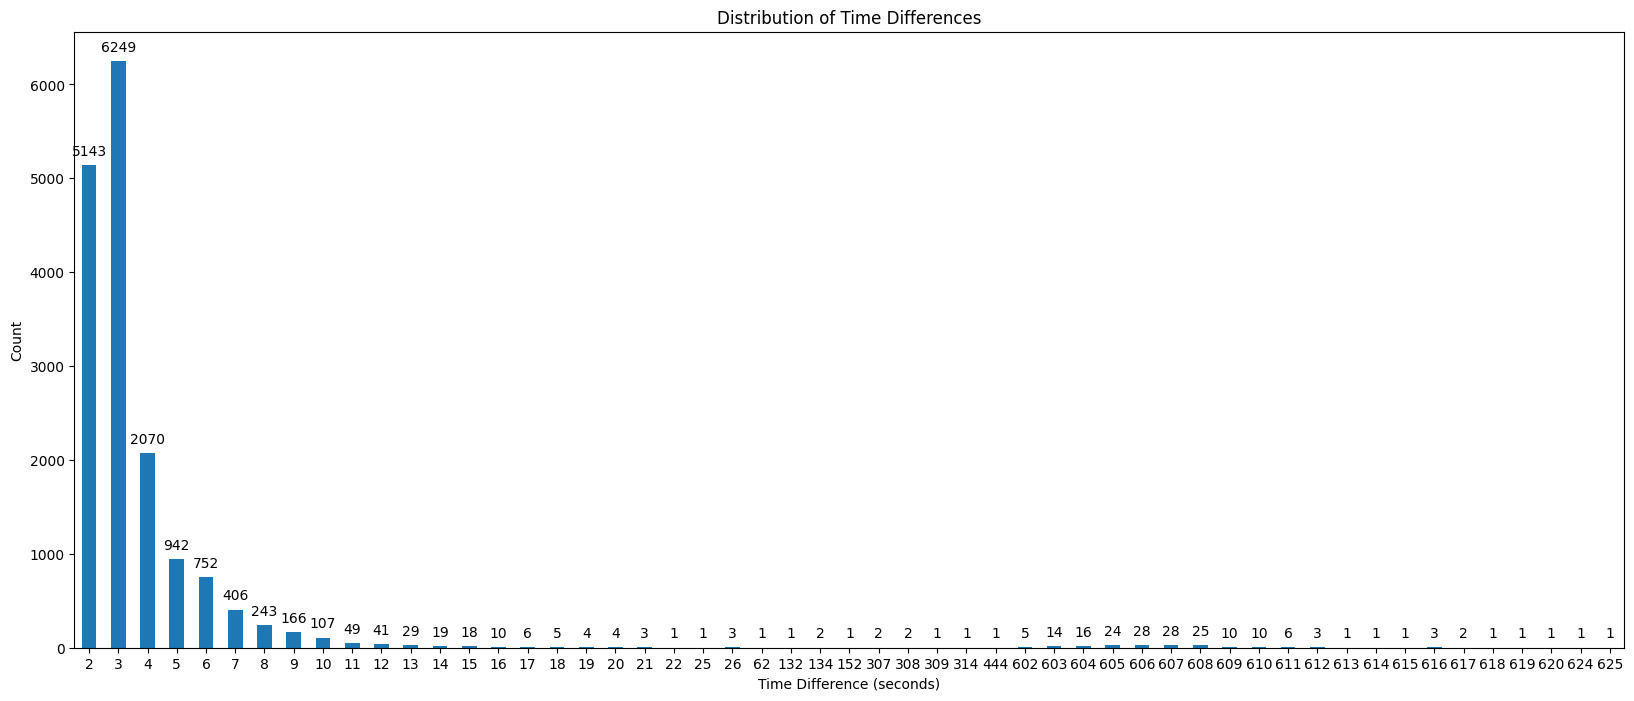

In [32]:
counts = matching_rows['event_time_seconds'].value_counts().sort_index()

plt.figure(figsize=(20, 8)) 
ax = counts.plot(kind='bar')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Time Differences')
plt.xticks(rotation=0)  

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
plt.show()

In [33]:
matching_rows.head(50)

event_type_x                       event_time  symbol_x  \
87         kline 2024-06-28 22:30:05.778000+02:00  PEPEUSDT   
88         kline 2024-06-28 22:30:08.218000+02:00  PEPEUSDT   
89         kline 2024-06-28 22:30:12.994000+02:00  PEPEUSDT   
90         kline 2024-06-28 22:30:16.994000+02:00  PEPEUSDT   
91         kline 2024-06-28 22:30:19.994000+02:00  PEPEUSDT   
92         kline 2024-06-28 22:30:22.438000+02:00  PEPEUSDT   
93         kline 2024-06-28 22:30:24.804000+02:00  PEPEUSDT   
94         kline 2024-06-28 22:30:28.523000+02:00  PEPEUSDT   
95         kline 2024-06-28 22:30:31.995000+02:00  PEPEUSDT   
96         kline 2024-06-28 22:30:37.072000+02:00  PEPEUSDT   
97         kline 2024-06-28 22:30:40.286000+02:00  PEPEUSDT   
98         kline 2024-06-28 22:30:44.648000+02:00  PEPEUSDT   
99         kline 2024-06-28 22:30:47.044000+02:00  PEPEUSDT   
100        kline 2024-06-28 22:30:49.294000+02:00  PEPEUSDT   
101        kline 2024-06-28 22:30:52.101000+02:00  PEPEUSDT   
102        kline 2024-06-28 22:30:55.760000+02:00  PEPEUSDT   
103        kline 2024-06-28 22:30:58.022000+02:00  PEPEUSDT   
104        kline 2024-06-28 22:31:01.634000+02:00  PEPEUSDT   
105        kline 2024-06-28 22:31:03.801000+02:00  PEPEUSDT   
106        kline 2024-06-28 22:31:06.008000+02:00  PEPEUSDT   
107        kline 2024-06-28 22:31:12.997000+02:00  PEPEUSDT   
108        kline 2024-06-28 22:31:15.998000+02:00  PEPEUSDT   
109        kline 2024-06-28 22:31:18.998000+02:00  PEPEUSDT   
110        kline 2024-06-28 22:31:24.692000+02:00  PEPEUSDT   
111        kline 2024-06-28 22:31:27.998000+02:00  PEPEUSDT   
112        kline 2024-06-28 22:31:33.999000+02:00  PEPEUSDT   
113        kline 2024-06-28 22:31:38.906000+02:00  PEPEUSDT   
114        kline 2024-06-28 22:31:41.401000+02:00  PEPEUSDT   
115        kline 2024-06-28 22:31:49.343000+02:00  PEPEUSDT   
116        kline 2024-06-28 22:31:52.118000+02:00  PEPEUSDT   
117        kline        2024-06-28 22:31:55+02:00  PEPEUSDT   
118        kline 2024-06-28 22:31:57.525000+02:00  PEPEUSDT   
119        kline 2024-06-28 22:32:00.164000+02:00  PEPEUSDT   
120        kline 2024-06-28 22:32:06.001000+02:00  PEPEUSDT   
121        kline 2024-06-28 22:32:08.763000+02:00  PEPEUSDT   
122        kline 2024-06-28 22:32:12.001000+02:00  PEPEUSDT   
123        kline 2024-06-28 22:32:14.054000+02:00  PEPEUSDT   
124        kline 2024-06-28 22:32:19.010000+02:00  PEPEUSDT   
125        kline 2024-06-28 22:32:22.615000+02:00  PEPEUSDT   
126        kline 2024-06-28 22:32:24.949000+02:00  PEPEUSDT   
127        kline 2024-06-28 22:32:28.606000+02:00  PEPEUSDT   
128        kline 2024-06-28 22:32:35.101000+02:00  PEPEUSDT   
129        kline 2024-06-28 22:32:38.277000+02:00  PEPEUSDT   
130        kline 2024-06-28 22:32:41.003000+02:00  PEPEUSDT   
131        kline 2024-06-28 22:32:48.894000+02:00  PEPEUSDT   
132        kline 2024-06-28 22:32:52.838000+02:00  PEPEUSDT   
133        kline 2024-06-28 22:32:57.635000+02:00  PEPEUSDT   
134        kline 2024-06-28 22:33:00.025000+02:00  PEPEUSDT   
135        kline 2024-06-28 22:33:02.488000+02:00  PEPEUSDT   
136        kline 2024-06-28 22:33:04.983000+02:00  PEPEUSDT   

           kline_start_time_x               kline_close_time_x interval_x  \
87  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
88  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
89  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
90  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
91  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
92  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
93  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
94  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
95  2024-06-28 22:30:00+02:00 2024-06-28 22:44:59.999000+02:00        15m   
96  2024-06-28 22:30

In [116]:
split_index = 51668

df1 = df.iloc[:split_index] 
df2 = df.iloc[split_index:]  

In [139]:
df1.tail()

event_type                       event_time    symbol  \
51664      kline 2024-06-30 21:57:31.184000+02:00  PEPEUSDT   
51665      kline 2024-06-30 21:57:33.780000+02:00  PEPEUSDT   
51666      kline 2024-06-30 21:57:36.780000+02:00  PEPEUSDT   
51667      kline 2024-06-30 21:57:40.780000+02:00  PEPEUSDT   
51668      kline 2024-06-30 21:57:44.742000+02:00  PEPEUSDT   

               kline_start_time                 kline_close_time interval  \
51664 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51665 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51666 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51667 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51668 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   

       first_trade_id  last_trade_id  open_price  close_price  high_price  \
51664       132181759      132184145    0.000012     0.000012    0.000012   
51665       132181759      132184155    0.000012     0.000012    0.000012   
51666       132181759      132184158    0.000012     0.000012    0.000012   
51667       132181759      132184160    0.000012     0.000012    0.000012   
51668       132181759      132184161    0.000012     0.000012    0.000012   

       low_price        volume  number_of_trades  is_kline_closed  \
51664   0.000012  1.072249e+11              2387            False   
51665   0.000012  1.104999e+11              2397            False   
51666   0.000012  1.106537e+11              2400            False   
51667   0.000012  1.106667e+11              2402            False   
51668   0.000012  1.106695e+11              2403            False   

       quote_assest_volume  take_buy_base_asset_volume  \
51664         1.246200e+06                5.899466e+10   
51665         1.284256e+06                6.226968e+10   
51666         1.286042e+06                6.235574e+10   
51667         1.286193e+06                6.236870e+10   
51668         1.286226e+06                6.237158e+10   

       taker_buy_quote_asset_volume  ignore   time_diff_event_time  \
51664                 685979.655132       0 0 days 00:00:02.434000   
51665                 724035.355751       0 0 days 00:00:02.596000   
51666                 725035.355742       0        0 days 00:00:03   
51667                 725185.999107       0        0 days 00:00:04   
51668                 725219.407792       0 0 days 00:00:03.962000   

       event_time_seconds  
51664                   2  
51665                   3  
51666                   3  
51667                   4  
51668                   4

In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51668 entries, 0 to 51668
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype                        
---  ------                        --------------  -----                        
 0   event_type                    51668 non-null  object                       
 1   event_time                    51668 non-null  datetime64[ns, Europe/Berlin]
 2   symbol                        51668 non-null  object                       
 3   kline_start_time              51668 non-null  datetime64[ns, Europe/Berlin]
 4   kline_close_time              51668 non-null  datetime64[ns, Europe/Berlin]
 5   interval                      51668 non-null  object                       
 6   first_trade_id                51668 non-null  int64                        
 7   last_trade_id                 51668 non-null  int64                        
 8   open_price                    51668 non-null  float64                      
 9   

In [118]:
len(df[df['is_kline_closed'] == True])

304

In [131]:
df['kline_close_time'] = pd.to_datetime(df['kline_close_time'], unit='ms', utc=True)
df['kline_start_time'] = pd.to_datetime(df['kline_start_time'], unit='ms', utc=True)
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms', utc=True)

# Convert datetime to Europe/Berlin timezone (UTC+2)
#datetime to berlin timezone UTC+2
df['kline_close_time'] = df['kline_close_time'].dt.tz_convert('Europe/Berlin')
df['kline_start_time'] = df['kline_start_time'].dt.tz_convert('Europe/Berlin')
df['event_time'] = df['event_time'].dt.tz_convert('Europe/Berlin')

In [138]:
df.tail()

event_type                       event_time    symbol  \
51663      kline 2024-06-30 21:57:31.184000+02:00  PEPEUSDT   
51664      kline 2024-06-30 21:57:33.780000+02:00  PEPEUSDT   
51665      kline 2024-06-30 21:57:36.780000+02:00  PEPEUSDT   
51666      kline 2024-06-30 21:57:40.780000+02:00  PEPEUSDT   
51667      kline 2024-06-30 21:57:44.742000+02:00  PEPEUSDT   

               kline_start_time                 kline_close_time interval  \
51663 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51664 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51665 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51666 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   
51667 2024-06-30 21:45:00+02:00 2024-06-30 21:59:59.999000+02:00      15m   

       first_trade_id  last_trade_id  open_price  close_price  high_price  \
51663       132181759      132184145    0.000012     0.000012    0.000012   
51664       132181759      132184155    0.000012     0.000012    0.000012   
51665       132181759      132184158    0.000012     0.000012    0.000012   
51666       132181759      132184160    0.000012     0.000012    0.000012   
51667       132181759      132184161    0.000012     0.000012    0.000012   

       low_price        volume  number_of_trades  is_kline_closed  \
51663   0.000012  1.072249e+11              2387            False   
51664   0.000012  1.104999e+11              2397            False   
51665   0.000012  1.106537e+11              2400            False   
51666   0.000012  1.106667e+11              2402            False   
51667   0.000012  1.106695e+11              2403            False   

       quote_asset_volume  taker_buy_base_asset_volume  \
51663        1.246200e+06                 5.899466e+10   
51664        1.284256e+06                 6.226968e+10   
51665        1.286042e+06                 6.235574e+10   
51666        1.286193e+06                 6.236870e+10   
51667        1.286226e+06                 6.237158e+10   

       taker_buy_quote_asset_volume ignore                   event_time_utc  \
51663                 685979.655132      0 2024-06-30 19:57:31.184000+00:00   
51664                 724035.355751      0 2024-06-30 19:57:33.780000+00:00   
51665                 725035.355742      0 2024-06-30 19:57:36.780000+00:00   
51666                 725185.999107      0 2024-06-30 19:57:40.780000+00:00   
51667                 725219.407792      0 2024-06-30 19:57:44.742000+00:00   

                     event_time_europe  
51663 2024-06-30 21:57:31.184000+02:00  
51664 2024-06-30 21:57:33.780000+02:00  
51665 2024-06-30 21:57:36.780000+02:00  
51666 2024-06-30 21:57:40.780000+02:00  
51667 2024-06-30 21:57:44.742000+02:00